In [8]:
## import standard libraries
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import scipy

## import custom scripts
from corner_methods_2 import *

In [9]:
## read in images and truth points
image_path = os.path.join(os.getcwd(), "data/Urban_Corner_datasets/Images")
ground_truth_path = os.path.join(os.getcwd(), "data/Urban_Corner_datasets/Ground_Truth")

images = []
image_names = []
ground_truth_corners = []
for image in sorted(os.listdir(image_path)):
    corners = f"{image.split('.')[0]}.txt"
    image_names.append(image.split('.')[0])
    images.append(cv2.imread(os.path.join(image_path, image), cv2.IMREAD_GRAYSCALE))
    
    with open(os.path.join(ground_truth_path, corners), 'r') as file:
        coordinate_pairs = [tuple(map(int, line.split())) for line in file]
    ground_truth_corners.append(coordinate_pairs)

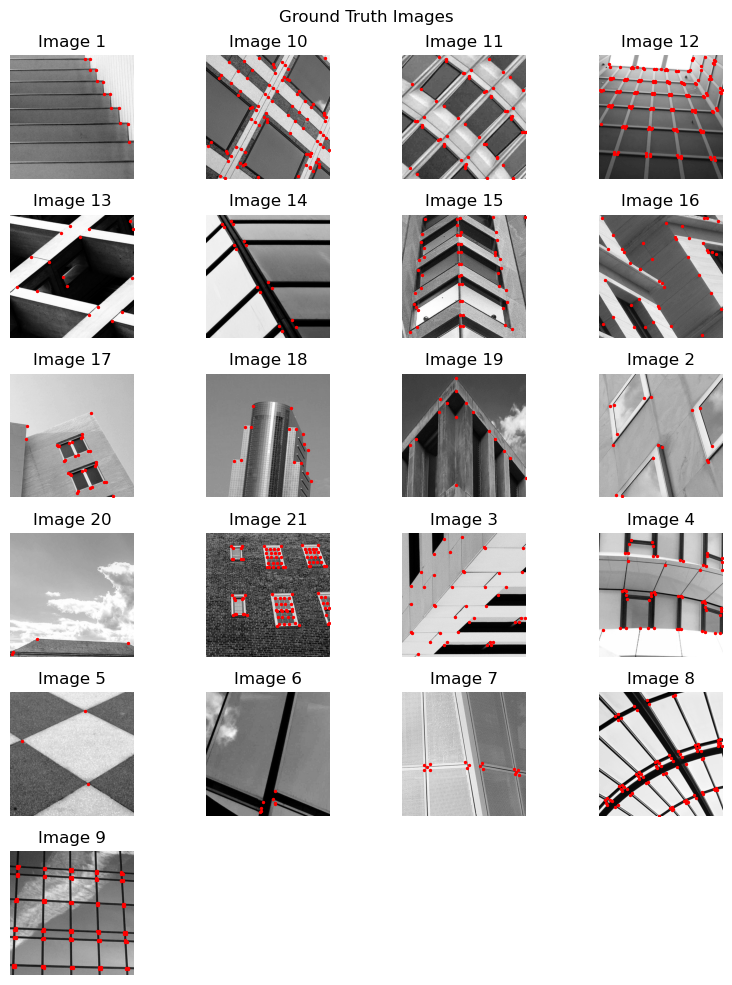

In [10]:
plt.figure(figsize=(8,10))
plt.suptitle("Ground Truth Images")
for i in range(len(images)):
    plt.subplot(6, 4, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Image {image_names[i]}")
    for corner in ground_truth_corners[i]:
        plt.scatter(corner[1], corner[0], color="red", marker='o', s=2)
        
plt.tight_layout()
plt.savefig("results/ground_truth.png")
plt.show()

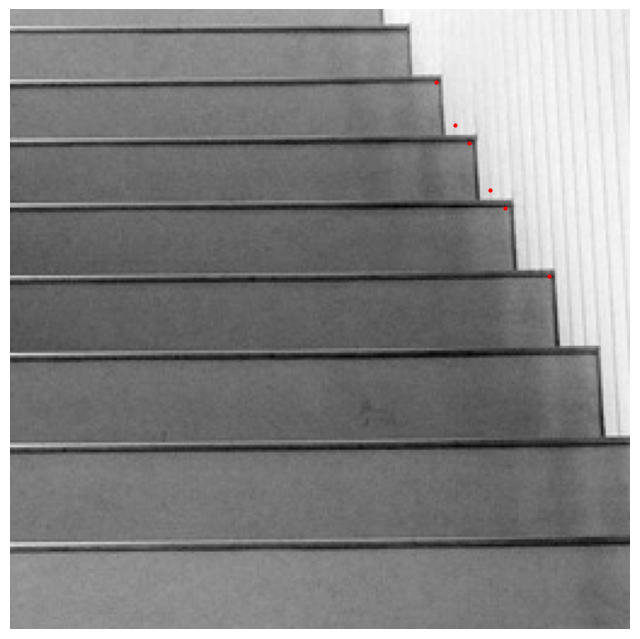

In [12]:
plt.figure(figsize=(8,10))
i=0
plt.imshow(images[i], cmap="gray")
plt.axis("off")
corners = akaze(images[i])
if corner:
    x_coords, y_coords = zip(*corners)
    plt.scatter(x_coords, y_coords, color="red", marker='o', s=4)
plt.show()